<a href="https://colab.research.google.com/github/AttiBae/BasicML/blob/main/Chapter3_Simple_DogsAndCats_Categorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.autograd import Variable as Variable
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models, transforms
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import time
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/BasicML/Chapter3/dogvscat/'
files = glob(os.path.join(path, '*/*/*/*.jpg'))

print(f'Total # of images {len(files)}')

Total # of images 10000


In [ ]:
do_transform = transforms.Compose([transforms.Resize((112,112)),
                                   transforms.ToTensor()])

trainset = datasets.ImageFolder(path+'dataset/training_set', do_transform)
testset = datasets.ImageFolder(path+'dataset/test_set', do_transform)

In [ ]:
my_trainset = []
my_testset = []
for i in range(len(trainset)):
  sample = trainset[i][0]
  sample_label = trainset[i][1]
  my_trainset.append((sample, sample_label))

for i in range(len(testset)):
  sample = testset[i][0]
  sample_label = testset[i][1]
  my_testset.append((sample, sample_label))

In [ ]:
train_loader = DataLoader(my_trainset, batch_size = 32, shuffle = True)
test_loader = DataLoader(my_testset, batch_size = 32, shuffle = True)

dataloaders = [train_loader, test_loader]

In [ ]:
image, label = next(iter(train_loader))

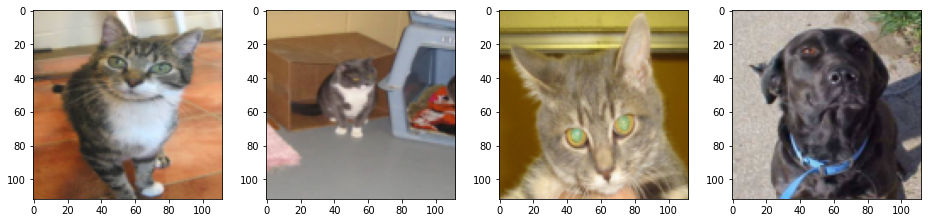

In [ ]:
plt.figure(figsize=(16, 16))
for i in range(4):
    plt.subplot(4, 4, i+1)
    plt.imshow(image[i].permute(1,2,0))

In [ ]:
model = models.resnet18(pretrained = False)
num_ft = model.fc.in_features
model.fc = nn.Linear(num_ft, 2)

if torch.cuda.is_available():
  device = torch.device('cuda')
  model = model.to(device)
  is_cuda = 1
else: is_cuda = 0

In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

num_epochs = 20

data_num = [len(trainset),len(testset)]

In [ ]:
start = time.time()
best_model = model.state_dict()
best_acc = 0.0

for epoch in range(num_epochs):
  print('-----------------------------------')
  print('{} Epoch'.format(epoch+1))

  for mode in ['train', 'test']:
    if mode == 'train':
      model.train(True)
      flag = 0
    else:
      model.train(False)
      flag = 1

    running_loss = 0.0  ## Loss & Acc Initialize
    running_corrects = 0

    for data in dataloaders[flag]:  ## Read Data from dataloaders
      images, labels = data
      if is_cuda:
        images, labels = Variable(images.cuda()), Variable(labels.cuda())  ## CUDA Setting
      else:
        images, labels = Variable(images), Variable(labels)

      optimizer.zero_grad()  ## Optimizer initialize every batch
      outputs = model(images)  ## Put images to network
      _, pred = torch.max(outputs.data, 1)  ## prediction - cat & dog represented each 0 & 1
      loss = criterion(outputs, labels)

      if mode == 'train':
        loss.backward()  ## get gradient
        optimizer.step()  ## optimizer task for network's train

      running_loss += loss.item()
      running_corrects += torch.sum(pred == labels.data)

    epoch_loss = running_loss / data_num[flag]
    epoch_acc = running_corrects / data_num[flag] * 100  ## Accuracy (0~100%)
    print('{}\tLoss : {:.5} Acc : {:.3}'.format(mode, epoch_loss, epoch_acc))
    
    if mode == 'test' and epoch_acc > best_acc:  ## Store best-performed model data
      best_acc = epoch_acc
      best_model = model.state_dict()

  print()

elapsed_time = time.time() - start
print('Elapsed time : {}s'.format(elapsed_time))

-----------------------------------
1 Epoch
train	Loss : 0.021339 Acc : 56.2
test	Loss : 0.021556 Acc : 57.0

-----------------------------------
2 Epoch
train	Loss : 0.02066 Acc : 60.7
test	Loss : 0.021342 Acc : 58.3

-----------------------------------
3 Epoch
train	Loss : 0.020168 Acc : 62.9
test	Loss : 0.020636 Acc : 62.4

-----------------------------------
4 Epoch
train	Loss : 0.01961 Acc : 65.2
test	Loss : 0.021324 Acc : 60.1

-----------------------------------
5 Epoch
train	Loss : 0.019197 Acc : 66.4
test	Loss : 0.0202 Acc : 63.9

-----------------------------------
6 Epoch
train	Loss : 0.018774 Acc : 68.3
test	Loss : 0.020958 Acc : 61.2

-----------------------------------
7 Epoch
train	Loss : 0.01849 Acc : 69.0
test	Loss : 0.019827 Acc : 65.2

-----------------------------------
8 Epoch
train	Loss : 0.018071 Acc : 69.9
test	Loss : 0.019801 Acc : 63.5

-----------------------------------
9 Epoch
train	Loss : 0.01749 Acc : 71.6
test	Loss : 0.019188 Acc : 67.1

----------------

In [ ]:
model2 = models.resnet18(pretrained = True)
num_ft = model2.fc.in_features
model2.fc = nn.Linear(num_ft, 2)

if torch.cuda.is_available():
  device = torch.device('cuda')
  model2 = model2.to(device)
  is_cuda = 'True'
else: is_cuda = 'False'


learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr = learning_rate)

num_epochs = 20

data_num = [len(trainset),len(testset)]

In [ ]:
start = time.time()

best_model = model2.state_dict()
best_acc = 0.0
flag = 0
for epoch in range(num_epochs):
  print('-----------------------------------')
  print('{} Epoch'.format(epoch+1))
  for mode in ['train', 'test']:
    if mode == 'train':
      model.train(True)
      flag = 0
    else:
      model.train(False)
      flag = 1

    running_loss = 0.0
    running_corrects = 0
    # a = 0
    for data in dataloaders[flag]:
      # a+=1
      # print(a)
      images, labels = data

      if is_cuda:
        images, labels = Variable(images.cuda()), Variable(labels.cuda())
      else:
        images, labels = Variable(images), Variable(labels)

      optimizer.zero_grad()

      outputs = model2(images)
      _, pred = torch.max(outputs.data, 1)
      loss = criterion(outputs, labels)

      if mode == 'train':
        loss.backward()
        optimizer.step()

      running_loss += loss.item()
      running_corrects += torch.sum(pred == labels.data)

    epoch_loss = running_loss / data_num[flag]
    epoch_acc = running_corrects / data_num[flag] * 100

    print('{}\tLoss : {:.5} Acc : {:.3}'.format(mode, epoch_loss, epoch_acc))

    if mode == 'test' and epoch_acc > best_acc:
      best_acc = epoch_acc
      best_model = model.state_dict()
  print()

elapsed_time = time.time() - start
print('Elapsed time : {}s'.format(elapsed_time))

-----------------------------------
1 Epoch
train	Loss : 0.013499 Acc : 79.3
test	Loss : 0.0097671 Acc : 86.6

-----------------------------------
2 Epoch
train	Loss : 0.0083666 Acc : 88.9
test	Loss : 0.0078323 Acc : 89.8

-----------------------------------
3 Epoch
train	Loss : 0.0067934 Acc : 91.1
test	Loss : 0.0072959 Acc : 90.0

-----------------------------------
4 Epoch
train	Loss : 0.0056667 Acc : 92.7
test	Loss : 0.0068483 Acc : 90.4

-----------------------------------
5 Epoch
train	Loss : 0.0050619 Acc : 93.4
test	Loss : 0.0062056 Acc : 91.6

-----------------------------------
6 Epoch
train	Loss : 0.0045042 Acc : 94.3
test	Loss : 0.005951 Acc : 92.7

-----------------------------------
7 Epoch
train	Loss : 0.0040075 Acc : 94.9
test	Loss : 0.0057509 Acc : 93.4

-----------------------------------
8 Epoch
train	Loss : 0.003495 Acc : 95.6
test	Loss : 0.0057027 Acc : 93.0

-----------------------------------
9 Epoch
train	Loss : 0.0033099 Acc : 95.9
test	Loss : 0.0054497 Acc : 9